# 2-D diffusion equation
Yannick Wack

Inspired by [G. Nervadof](https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a)

In [15]:
import heatmap
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

## General heat condution equation
\\[\frac{\partial T}{\partial t}=\alpha \Delta T  = \alpha \left(\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}\right) \quad \mathrm{with} \quad \alpha = \frac{k}{\rho C}\\] 
## Spatial discretization
We aproximate the 2nd order derivative \\(\frac{\partial^2 T}{\partial x^2} \& \frac{\partial^2 T}{\partial y^2}\\) using a [second-order central difference](https://en.wikipedia.org/wiki/Finite_difference):
\\[ u''(x) = \frac{u(x+\Delta x)-2u(x)+u(x-\delta x)}{\Delta x^2}\\]

In [16]:
def deriv2_x(u,i,j,dx):
    ddu = ( u[i+1,j]-2*u[i,j]+u[i-1,j] ) / dx**2
    return ddu
def deriv2_y(u,i,j,dx):
    ddu = ( u[i,j+1]-2*u[i,j]+u[i,j-1] ) / dx**2
    return ddu

Now we can compute the right hand side \\(\mathrm{RHS} = \alpha \left(\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}\right) \\) of the heat equation in every point \\((i,j)\\) using this finite difference approximations:

In [17]:
def rhs(T,alpha,dx):
    sz = np.shape(T)
    rhs = np.zeros(sz)
    for i in range(1, sz[0]-1, 1):
            for j in range(1, sz[1]-1, 1):
                rhs[i,j] = alpha * (deriv2_x(T,i,j,dx) + deriv2_y(T,i,j,dx))
    return rhs

## Boundary conditions

In [18]:
def set_boundaries(T,T_top,T_inf):
    sz = np.shape(T)
    T[-1:, int(sz[0]/4):int(sz[0]*3/4)] = T_top
    T[ :, :1] = T_inf
    T[ :1, :] = T_inf
    T[ :, -1:] = T_inf
    return T


## Temporal discretization     

In [19]:
def explicit_euler_step(T0,alpha,dt,dx):
        T = T0 + dt * rhs(T0,alpha,dx)
        return T

## Computation
### Parameters

In [37]:
plate_length = 50
alpha        = 2
T_initial    = 0
T_top        = 0
T_inf        = 0
time_steps   = 500
dx = 1
dt = (dx ** 2)/(4 * alpha)

### Initialize solution on the grid for <code> T[k,i,j] <code>

In [38]:
T = np.empty((time_steps, plate_length, plate_length))
T.fill(T_initial)
T[0,25,25] = 100
T[0] = set_boundaries(T[0],T_top,T_inf)

### Perform the calculation

In [39]:
for k in range(0, time_steps-1, 1):
    T[k+1] = explicit_euler_step( T[k] ,alpha,dt,dx)
    T[k+1] = set_boundaries(T[k+1],T_top,T_inf)
print("Computation finished")

Computation finished


## Plotting

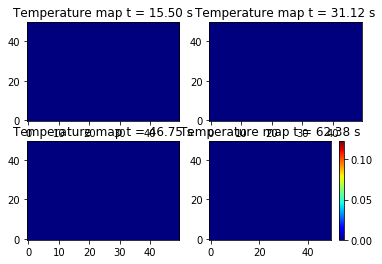

In [40]:
snap = heatmap.snapshots()
snap.plot(T,dt)

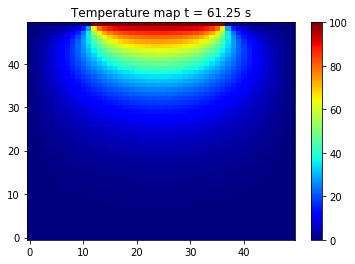

Done!


In [31]:
# Initialize plot
hm = heatmap.heatmap(T[0])

for k in range(0, time_steps-1, 10):
    t = dt * k
    
    clear_output(wait = True)
    hm.update(T[k],t)   
    plt.pause(0.1)

print("Done!")